<a href="https://colab.research.google.com/github/nattzza/AutoML-Data-Challenge/blob/main/KaggleDataChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Challenge - 

In [136]:
# !pip install pycaret

In [137]:
# !pip install interpret

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

## Load Data

In [153]:
google_drive_path = "/content/drive/MyDrive/0_data/data_challenge/"
X_train_name = "features_train.csv"
y_train_name = "target_train.csv"
X_test_name = "features_test.csv"

In [154]:
y_train = pd.read_csv(google_drive_path + y_train_name, index_col="Id").reset_index(drop=True)
print(y_train.shape)
y_train.head()

(10000, 1)


,Expected
0,0
1,0
2,2
3,1
4,2


In [141]:
X_train = pd.read_csv(google_drive_path + X_train_name, index_col="Id").reset_index(drop=True)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,0.414074,1.997513,2.280097,5.906375,0.150651,-5.641568,12.399412,5.011646,1.852362,0.475867,0.510913,-1.015441,0.199764,1.490854,0.076575,-4.479576,1.903053,0.452382,0.481742,1.259534,0.030284,5.292789,0.118012,1.522969,1.307279,23.808472,0.889536,-2.184300,-3.434408,-0.187053,-0.315984,...,0.072776,1.750517,1.121535,0.644969,-4.458461,16.767320,-0.315395,1.871807,2.163873,0.144154,0.641523,-1.486565,0.031982,0.894450,0.913196,0.046830,-1.276655,0.771211,2.038736,1.990629,0.004606,0.503038,0.622240,1.049451,0.000136,-22.219764,-0.058046,1.166972,-1.117488,0.989951,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,1.203232,4.598360,-5.775092,-6.516740,1.003522,13.381746,-3.584999,0.416845,2.924790,0.073121,-1.377308,-2.875074,0.554860,0.358751,3.775412,0.764284,1.068030,0.003890,0.037002,0.456791,1.161268,2.548486,0.083868,0.424432,4.847485,5.738793,-0.556860,-12.565164,4.490605,-0.204060,0.249571,...,0.782956,1.240777,2.092866,2.298090,-12.537208,-5.961822,-1.230639,7.049593,0.258340,2.231772,0.895187,-1.304038,0.007809,-15.059307,1.114274,0.533213,-0.011918,0.934703,0.413158,1.939804,0.699954,0.190458,0.406481,-1.817962,0.252635,10.887651,2.367816,-11.312185,0.416286,0.477416,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,0.176904,1.368589,-5.828967,14.266635,0.124223,13.647478,12.043413,0.221695,0.903116,0.803960,-0.132633,4.494041,0.982299,0.196872,0.001297,0.950084,0.854328,0.013964,0.410431,0.045722,0.346083,9.463682,0.034303,0.785419,0.886565,19.629010,0.698729,6.481368,-3.971667,-0.667759,-0.154754,...,0.260203,0.822976,0.432365,0.721396,-8.987762,-7.022517,6.344787,0.136055,0.929645,0.933891,1.975385,-0.773477,3.272705,4.053084,3.771948,0.105972,0.693894,0.246871,3.701254,0.547627,0.017933,0.937699,0.137430,0.516001,0.036088,-5.912876,0.240362,4.619169,-0.910393,9.600796,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,3.147786,8.165835,-4.796236,4.220389,0.011627,1.968096,1.924126,0.345798,0.125466,2.634259,0.296963,2.786869,0.294387,4.759162,0.327186,-1.805663,2.029318,0.072633,0.013685,0.162798,0.165759,-16.324343,0.296098,0.187905,1.430911,25.526839,0.340931,7.610446,-6.897755,0.622711,-0.833872,...,0.769423,0.565071,0.360012,0.526670,13.163752,-1.731318,-2.016885,10.358130,0.636688,0.212999,-1.715203,-1.279456,2.302670,-7.893884,0.440732,0.681664,-0.363657,0.873688,5.892810,0.815144,3.744437,2.923058,4.504636,-1.720670,1.750316,14.558369,1.496706,-0.247011,0.099182,1.205843,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,0.841208,2.686701,-6.056380,0.848508,0.990852,3.383298,-6.570478,0.648400,0.758079,0.835232,-0.585741,-4.401633,0.783268,0.049123,0.495727,0.228554,1.564695,0.584950,0.845195,0.513798,0.030185,0.296172,0.266663,0.307711,0.533678,5.240953,-0.338997,-2.797768,6.709862,-1.158840,0.735793,...,0.774417,4.527023,1.369383,0.893969,10.783789,4.286830,3.523166,60.634258,0.497629,0.205183,-0.608828,0.085580,0.296885,1.956517,0.000006,1.732382,2.153492,0.245138,2.157437,1.508039,0.712625,0.104814,0.882323,-0.903271,1.233372,4.658989,0.744118,-9.740877,1.089912,0.456917,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165


In [155]:
X_test = pd.read_csv(google_drive_path + X_test_name, index_col="Id")
print(X_test.shape)
X_test.head()

(20000, 120)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.242392,0.524801,9.531945,0.551043,0.853324,2.084798,-23.881055,1.752809,4.019658,0.611603,2.218305,-5.475461,7.092829,1.094443,-2.538781,-6.729620,0.237795,1.206781,1.422760,-0.180612,1.396366,0.979488,1.434289,3.406323,-0.885763,0.716380,2.489275,0.997524,1.915995,0.899200,-4.622357,1.136723,0.001150,0.754755,12.226808,1.591238,5.987862,5.515789,-1.161487,-0.770728,...,0.585232,0.126094,0.376469,0.574786,-11.681354,-2.820308,1.157463,5.907949,0.179032,0.145993,1.159353,-0.127226,0.112171,14.434562,0.060881,0.020313,0.664847,2.483776,1.627644,1.903501,0.287732,0.325801,0.280310,0.381459,0.374989,7.030882,0.075547,-1.513543,0.079405,0.330533,0.996646,0.464636,0.927718,2.136614,-0.625167,11.164489,12.651970,3.191951,0.770754,11.564876
1,0.197594,1.029150,13.064256,2.697584,0.032053,0.555707,-47.774112,0.211458,-5.489373,0.263423,1.816638,1.160366,-14.959178,5.126042,1.875191,18.457412,3.312714,1.560621,1.735474,0.256037,-10.584147,0.008305,1.564000,0.267022,1.870688,0.716562,0.607814,0.648007,0.230450,0.011582,3.806898,0.020732,0.572186,2.249721,0.511789,1.434640,13.352919,-1.109945,0.034413,-0.412630,...,0.209444,4.033148,0.485818,1.709705,0.202549,-1.850990,0.783257,18.881935,1.272780,5.099039,-0.272946,0.297756,0.338453,5.741037,1.570412,0.436224,-0.281527,0.314221,-5.143795,1.773771,0.734051,3.407221,1.470837,-0.364636,0.241822,-5.396234,0.749838,-4.929946,1.591517,0.505449,16.166253,0.074028,0.114691,0.700676,0.909923,-12.253487,-0.839493,3.405661,0.772885,2.602072
2,0.676448,0.250171,10.370677,1.255717,0.028614,1.916394,65.747722,1.791534,-10.868221,0.251500,0.232078,-1.802028,-18.378338,0.809821,-3.275000,-7.077814,1.484662,0.031692,2.465045,0.307040,-7.137388,0.846074,5.591216,3.910489,-3.256410,0.634605,0.175028,0.260047,0.345728,0.153829,1.006709,-1.292514,0.042953,1.917191,4.803465,0.322039,3.983834,-4.953978,-1.023604,-0.266444,...,0.441835,0.948882,1.930040,0.203414,2.928962,0.011535,1.117406,0.976244,0.758861,0.000021,-0.075751,0.194697,0.051882,6.963036,0.016424,0.172488,-1.330170,0.256868,-1.672424,0.550124,1.289203,1.323583,2.258443,1.806180,4.221546,2.947377,0.198932,14.215106,-0.035567,3.925551,1.382589,0.527797,0.818678,0.780533,1.833105,9.943211,-11.567759,0.387331,0.345355,0.274009
3,1.561018,0.617100,0.379516,1.515827,0.005581,0.002844,-11.036037,0.154748,17.727657,0.398472,2.360013,-6.004230,-5.896391,0.699201,-7.382280,-1.840532,4.447702,1.728500,1.342291,-0.654027,1.907041,0.139594,0.926287,2.752938,-1.801898,1.246125,0.150095,0.065125,0.596092,0.408084,-14.367141,0.116213,6.748466,0.729166,3.874274,0.721355,4.820687,1.836020,-0.364169,1.403711,...,0.275873,0.420186,1.010259,0.378360,5.229149,1.378002,-1.239871,0.083456,0.606083,0.002386,0.331301,2.435104,6.751900,-6.975256,3.442080,0.282886,0.276915,0.682648,-0.704601,1.422613,3.906282,1.031427,1.098815,0.373378,0.348759,6.999267,0.838138,-1.028964,-1.607655,1.395125,3.028235,0.664532,0.124984,0.438145,0.562478,1.999034,-3.481156,0.374161,0.657491,0.944878
4,0.403669,6.981975,0.535448,0.654590,0.670791,2.377098,8.185199,0.703429,5.420341,1.516365,1.682254,2.263138,1.885512,2.526971,4.453838,-7.513623,0.213211,0.708324,0.789214,0.354441,-4.322174,0.450528,1.054070,0.585033,0.366459,1.234771,0.283695,0.198913,0.407518,0.026926,18.378869,0.424736,0.624883,1.201906,4.956541,-1.439820,-17.205438,-1.147118,0.064819,-1.339787,...,0.631082,0.206047,1.131206,0.769384,6.230220,8.983258,4.020908,0.690354,1.717867,2.363097,-0.836150,-1.842170,0.001060,-7.838808,0.421738,0.004548,0.378372,1.231632,-0.988028,0.490586,0.090985,0.856655,0.299061,0.985308,0.368007,7.777481,0.215712,-8.533760,-0.559110,2.624362,2.218101,0.228779,0.15

## Check Data

In [143]:
# Check columns, data types and nulls
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000206e+00,1.653294,1.323895e+01,1.631063,1.004520e+00,1.011949e+00,0.520059,1.657632,-0.002513,1.671704,1.640184,0.018512,-0.045882,1.017392e+00,0.013475,0.080780,1.675241,9.969287e-01,1.622195,0.004442,0.044056,0.497931,9.959264e-01,9.931424e-01,0.218314,1.650296,1.003019e+00,0.502293,1.020662e+00,9.963078e-01,-0.010737,-0.018190,9.811721e-01,1.659255,9.588271e+00,0.013961,0.197767,-0.052100,0.023322,-0.003413,...,0.497234,1.669451,1.671225,1.645538,-0.039436,-0.079400,-0.027733,9.615469e+00,1.624225,9.831501e-01,0.004652,0.004133,9.942250e-01,0.086753,1.009154e+00,1.006046e+00,0.012977,1.658463,0.031468,1.633233,1.012985e+00,9.979990e-01,1.637923,0.025615,1.003058e+00,-0.098800,-0.010113,0.033083,-0.000504,1.647964,1.648705,0.497571,0.493227,1.635187,-0.000071,-0.026737,0.013010,1.620603,0.503886,1.667950
std,1.423822e+00,2.278088,1.870323e+01,2.040002,1.409997e+00,1.444751e+00,31.791384,2.116264,10.060025,2.251833,2.284041,3.680990,9.965037,1.429418e+00,9.969148,9.985038,2.222561,1.393660e+00,1.997111,1.002927,3.528149,0.288471,1.419872e+00,1.402773e+00,3.128920,2.067439,1.418846e+00,0.287762,1.465837e+00,1.415373e+00,9.929344,1.003334,1.381074e+00,2.226487,1.366015e+01,1.004743,9.987079,3.183651,0.992356,0.985365,...,0.287562,2.437585,2.226468,2.173891,9.871263,9.893477,3.405446,1.460689e+01,1.982281,1.380745e+00,0.989621,1.008432,1.420748e+00,9.965041,1.459089e+00,1.401479e+00,0.985100,2.074236,3.231366,1.977157,1.455476e+00,1.402316e+00,2.080050,0.989372,1.410221e+00,10.137330,0.993343,10.063717,1.008250,2.056929,2.188790,0.285955,0.290153,1.975617,0.997596,10.082855,9.968787,2.117979,0.285662,2.203032
min,1.282517e-08,0.024358,7.274511e-07,0.020518,3.379589e-11,1.348884e-07,-129.141171,0.019514,-37.427526,0.028163,0.028149,-14.056768,-36.008848,1.149819e-08,-38.529038,-36.690956,0.014462,8.918739e-09,0.022663,-3.810056,-13.921941,0.000017,2.141147e-09,2.526926e-09,-12.793088,0.019895,7.656300e-08,0.000066,1.013105e-08,1.332685e-07,-36.512220,-3.904443,5.575404e-09,0.035186,8.202144e-09,-4.085987,-36.310761,-11.866657,-3.934659,-4.055037,...,0.000069,0.020156,0.025924,0.014790,-39.738974,-34.243676,-14.481581,6.991405e-07,0.030373,2.364365e-08,-4.418794,-4.365723,8.306068e-09,-35.568307,9.581974e-08,2.321680e-09,-3.515773,0.014322,-16.112369,0.025260,5.561252e-10,4.357064e-09,0.018291,-3.926843,2.255416e-08,-40.440318,-3.666281,-38.750532,-3.926450,0.025084,0.022037,0.000128,0.000217,0.016691,-3.885360,-34.580159,-40.925480,0.016396,0.000139,0.029379
25%,1.040056e-01,0.509503,1.318718e+00,0.512428,1.042731e-01,1.005381e-01,-21.037225,0.507242,-6.698098,0.512798,0.502079,-2.405063,-6.627612,1.003465e-01,-6.629514,-6.614758,0.507513,1.

In [144]:
# Check class imbalance
y_train["Expected"].value_counts()

2    3365
0    3341
1    3294
Name: Expected, dtype: int64

## Data prep - Numeric features

In [145]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000206e+00,1.653294,1.323895e+01,1.631063,1.004520e+00,1.011949e+00,0.520059,1.657632,-0.002513,1.671704,1.640184,0.018512,-0.045882,1.017392e+00,0.013475,0.080780,1.675241,9.969287e-01,1.622195,0.004442,0.044056,0.497931,9.959264e-01,9.931424e-01,0.218314,1.650296,1.003019e+00,0.502293,1.020662e+00,9.963078e-01,-0.010737,-0.018190,9.811721e-01,1.659255,9.588271e+00,0.013961,0.197767,-0.052100,0.023322,-0.003413,...,0.497234,1.669451,1.671225,1.645538,-0.039436,-0.079400,-0.027733,9.615469e+00,1.624225,9.831501e-01,0.004652,0.004133,9.942250e-01,0.086753,1.009154e+00,1.006046e+00,0.012977,1.658463,0.031468,1.633233,1.012985e+00,9.979990e-01,1.637923,0.025615,1.003058e+00,-0.098800,-0.010113,0.033083,-0.000504,1.647964,1.648705,0.497571,0.493227,1.635187,-0.000071,-0.026737,0.013010,1.620603,0.503886,1.667950
std,1.423822e+00,2.278088,1.870323e+01,2.040002,1.409997e+00,1.444751e+00,31.791384,2.116264,10.060025,2.251833,2.284041,3.680990,9.965037,1.429418e+00,9.969148,9.985038,2.222561,1.393660e+00,1.997111,1.002927,3.528149,0.288471,1.419872e+00,1.402773e+00,3.128920,2.067439,1.418846e+00,0.287762,1.465837e+00,1.415373e+00,9.929344,1.003334,1.381074e+00,2.226487,1.366015e+01,1.004743,9.987079,3.183651,0.992356,0.985365,...,0.287562,2.437585,2.226468,2.173891,9.871263,9.893477,3.405446,1.460689e+01,1.982281,1.380745e+00,0.989621,1.008432,1.420748e+00,9.965041,1.459089e+00,1.401479e+00,0.985100,2.074236,3.231366,1.977157,1.455476e+00,1.402316e+00,2.080050,0.989372,1.410221e+00,10.137330,0.993343,10.063717,1.008250,2.056929,2.188790,0.285955,0.290153,1.975617,0.997596,10.082855,9.968787,2.117979,0.285662,2.203032
min,1.282517e-08,0.024358,7.274511e-07,0.020518,3.379589e-11,1.348884e-07,-129.141171,0.019514,-37.427526,0.028163,0.028149,-14.056768,-36.008848,1.149819e-08,-38.529038,-36.690956,0.014462,8.918739e-09,0.022663,-3.810056,-13.921941,0.000017,2.141147e-09,2.526926e-09,-12.793088,0.019895,7.656300e-08,0.000066,1.013105e-08,1.332685e-07,-36.512220,-3.904443,5.575404e-09,0.035186,8.202144e-09,-4.085987,-36.310761,-11.866657,-3.934659,-4.055037,...,0.000069,0.020156,0.025924,0.014790,-39.738974,-34.243676,-14.481581,6.991405e-07,0.030373,2.364365e-08,-4.418794,-4.365723,8.306068e-09,-35.568307,9.581974e-08,2.321680e-09,-3.515773,0.014322,-16.112369,0.025260,5.561252e-10,4.357064e-09,0.018291,-3.926843,2.255416e-08,-40.440318,-3.666281,-38.750532,-3.926450,0.025084,0.022037,0.000128,0.000217,0.016691,-3.885360,-34.580159,-40.925480,0.016396,0.000139,0.029379
25%,1.040056e-01,0.509503,1.318718e+00,0.512428,1.042731e-01,1.005381e-01,-21.037225,0.507242,-6.698098,0.512798,0.502079,-2.405063,-6.627612,1.003465e-01,-6.629514,-6.614758,0.507513,1.

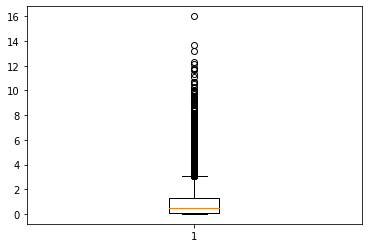

In [146]:
fig, ax = plt.subplots()

ax.boxplot(X_train["0"]);

In [147]:
outliers_col = {}

for col_name in X_train.columns.to_list():
  Q1 = X_train[col_name].quantile(0.01)
  Q3 = X_train[col_name].quantile(0.99)
  IQR = Q3 - Q1

  outliers = X_train[(X_train[col_name] < Q1 - 1.5 * IQR) | (X_train[col_name] > Q3 + 1.5 * IQR)].index.to_list()

  outliers_col[col_name] = outliers

In [148]:
outliers_col.values()

dict_values([[], [941, 2684, 2984, 3096, 4617, 7248], [8657], [242, 1683, 4343], [6036], [1594], [], [308, 4368, 5666, 5887, 6328], [], [430, 832, 1062, 1497, 1890, 2349, 3528, 4284, 8917, 9211, 9931], [228, 344, 432, 874, 1242, 1881, 4601, 5182, 6638, 9869, 9901], [], [], [], [], [], [1660, 2390, 2686, 4320, 4781, 4828, 8844, 9474, 9555], [7032], [239, 6260], [], [], [], [8429, 9487], [], [], [341, 2380, 9296], [], [], [4049], [], [], [], [], [936, 1647, 1949, 2651, 3139, 4950, 6731, 6955, 7223, 7332], [6809], [], [], [], [], [], [], [581, 733, 2385, 3719, 6567, 6573, 7724, 8675, 8952], [], [], [], [], [], [], [], [], [], [263, 3131], [], [1522], [], [], [], [371, 2161, 4603, 6426, 8174, 9696], [], [], [], [], [1113], [], [393, 1737, 2872, 5662, 6311, 7502], [], [], [546, 2815, 3283, 8554], [8820], [], [3890, 6413, 7807, 9015, 9415], [677, 1265, 1836, 7839, 9833], [], [2401, 4630, 6457, 7113, 8519], [], [], [113, 2389, 8967, 9397, 9985], [], [], [763, 5317, 8849, 9047], [], [601, 2711

In [149]:
outliers_list = []

for values_dict in outliers_col.values():
  for value in values_dict:
    outliers_list.append(value)

In [150]:
outliers_list = list(set(outliers_list))
len(outliers_list)

191

## Model data prep

In [151]:
# Split data in training and test

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_train.shape)
print("y_train shape:", X_train.shape)
print("y_test shape:", X_train.shape)

X_train shape: (8000, 120)
X_test shape: (8000, 120)
y_train shape: (8000, 120)
y_test shape: (8000, 120)


In [ ]:
# Pipelines for data preparation
numeric_transformer = Pipeline(steps=[
                                      ("scaler", StandardScaler())
                                      ])

preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, numeric_features),
                                               ])

In [ ]:
# Model pipeline
pipeline = Pipeline(steps=[
                            ("pre_process", preprocessor), 
                            ("model", model)
                            ])

In [ ]:
# Classification models to test
lr = LogisticRegression(random_state=42, solver='liblinear')
knn = KNeighborsClassifier()
nb = BernoulliNB()
svc = LinearSVC(random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada_boost = AdaBoostClassifier(random_state=42)
gbm = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# Support objects
models = {"LogisticRegression": lr,
          "KNNeighbors": knn,
          "BernoulliNB": nb,
          "LinearSVC": svc,
          "DecisionTree": dtree,
          "RandomForest": rf,
          "AdaBoost": ada_boost,
          "GradientBoosting": gbm,
          "XGB": xgb,
          }

In [ ]:
# Scoring - f1_macro
# metrics.f1_score(y_test, y_pred, average="macro")